# AdaBoost (Adaptive Boosting)
------------------------------------------------------------
## - In a nutshell, AdaBoost assists you to combine a number of weak classifiers into a single strong classifier. There are three interesting facts about AdaBoost. The first one is the weak learners in AdaBoost are decision trees with a single split (decision stumps). Second, AdaBoost works by putting more weight on instances that are relatively difficult to classify, and vice versa. Lastly, AdaBoost algorithm could be applied to both classification and regression.
------------------------------------------------------------

Original papers: 
https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.51.6252&rep=rep1&type=pdf
https://www.cs.princeton.edu/courses/archive/spr07/cos424/papers/boosting-survey.pdf

#### - AdaBoost is Ensemble learning and this kind of learning is combining several base algorithms to form one optimized predictive algorithm. Random Forest is one of the ensemble learning so the algorithm takes several differents trees and aggregate them into one final, strong predictor. 
#### - Ensemble methods could be divided into two groups: Sequential Learners and Parallel Learners.
#### - AdaBoost is one of Sequential Learners that different models are generated sequentially and the mistakes of previous models are learned by their successors. Therefore, the aim for this is exploiting the dependency between models by giving the mislabeled examples higher weights. In other words, more weight is assigned to the incorrectly classified samples so they will be classified correctly in the next decision stump. In addition, weight is also assigned to each classifier based on the accuracy of the classifier so it denotes high accuracy means high weight.
------------------------------------------------------------
Given: $(x_1,y_1), \dots (x_m,y_m)$, where $ x \in \mathcal{X}, y_i \in \{-1,+1\}$

__Initialization__: $D_i(i) = \frac{1}{m}$, Identical weight for each training samples $x_1,\dots , x_m$

For $t = 1\dots T$

1. Train Weak Learners using distribution $D_t$

2. Get the best weak hypothesis(learner) ($h_t: \mathcal{X} \rightarrow \{-1,+1\} $) among all possible hypothesis set in terms of weighted training error: 

$$\epsilon_t = Pr_{i \sim D_t}(h(x_i)\neq y_i)$$
3. Choose $\alpha_t = \frac{1}{2}ln(\frac{1 - \epsilon_t}{\epsilon_t})$

4. Update the weight for each sample as the following: 

$$D_{t+1}(i) = \frac {D_t(i)\alpha_ty_th_t(x_i)}{Z_t}$$
Where $Z_t$ is the normalization factor.


Output the final hypthesis:
$$H(x)= sign (\sum_{i=1}^{T}\alpha_t h_t(x))$$

Reference websites for AdaBoost: <br> 
1. https://blog.paperspace.com/adaboost-optimizer/#:~:text=AdaBoost%20is%20an%20ensemble%20learning,turn%20them%20into%20strong%20ones.
2. https://towardsdatascience.com/understanding-adaboost-2f94f22d5bfe

### Lets start with the toy example
#### https://numpy.org/doc/stable/reference/generated/numpy.vstack.html
#### https://numpy.org/doc/stable/reference/generated/numpy.hstack.html


(23, 2)
The sample weights in the beginning [0.04347826 0.04347826 0.04347826 0.04347826 0.04347826 0.04347826
 0.04347826 0.04347826 0.04347826 0.04347826 0.04347826 0.04347826
 0.04347826 0.04347826 0.04347826 0.04347826 0.04347826 0.04347826
 0.04347826 0.04347826 0.04347826 0.04347826 0.04347826]


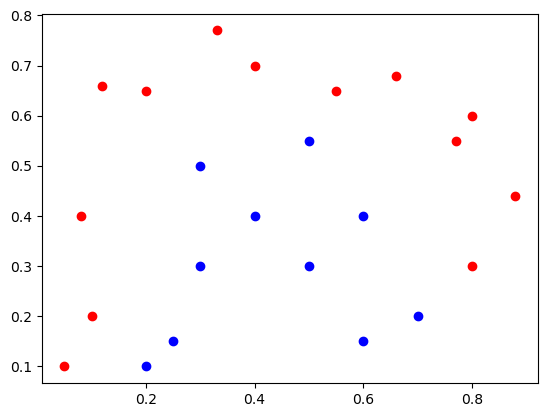

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import export_text
x1 = np.array([.1,.2,.4,.8, .8, .05,.08,.12,.33,.55,.66,.77,.88,.2,.3,.4,.5,.6,.25,.3,.5,.7,.6])
x2 = np.array([.2,.65,.7,.6, .3,.1,.4,.66,.77,.65,.68,.55,.44,.1,.3,.4,.3,.15,.15,.5,.55,.2,.4])
y = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1])
X = np.vstack((x1,x2)).T
N = len(y)
learning_rate= 1
print(X.shape)
sample_weight = np.ones(N)/N
print("The sample weights in the beginning", sample_weight)
plt.scatter(X[y==1,0],X[y==1,1],color ='red')
plt.scatter(X[y==-1,0],X[y==-1,1],color ='blue')


In [36]:
display(X)
print(X[y==1,0])
print(X[y==1,1])

array([[0.1 , 0.2 ],
       [0.2 , 0.65],
       [0.4 , 0.7 ],
       [0.8 , 0.6 ],
       [0.8 , 0.3 ],
       [0.05, 0.1 ],
       [0.08, 0.4 ],
       [0.12, 0.66],
       [0.33, 0.77],
       [0.55, 0.65],
       [0.66, 0.68],
       [0.77, 0.55],
       [0.88, 0.44],
       [0.2 , 0.1 ],
       [0.3 , 0.3 ],
       [0.4 , 0.4 ],
       [0.5 , 0.3 ],
       [0.6 , 0.15],
       [0.25, 0.15],
       [0.3 , 0.5 ],
       [0.5 , 0.55],
       [0.7 , 0.2 ],
       [0.6 , 0.4 ]])

[0.1  0.2  0.4  0.8  0.8  0.05 0.08 0.12 0.33 0.55 0.66 0.77 0.88]
[0.2  0.65 0.7  0.6  0.3  0.1  0.4  0.66 0.77 0.65 0.68 0.55 0.44]


https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

In [2]:
def plot_decision_boundary(classifier, X, y, N = 50, scatter_weights = np.ones(len(y)) , ax = None ):
    '''Utility function to plot decision boundary and scatter plot of data'''
    # find the min and max x and y coordinates for our data
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    # meshgrid to help plot desired shape
    xx, yy = np.meshgrid( np.linspace(x_min, x_max, N), np.linspace(y_min, y_max, N))
    zz = np.array( [classifier.predict_proba
                    (np.array([xi,yi]).reshape(1,-1))[:,1] for  xi, yi in zip(np.ravel(xx), np.ravel(yy))])
    Z = zz.reshape(xx.shape)
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.gca()
    # create the decision boundary
    ax.contourf(xx, yy, Z, 2, cmap='RdBu', alpha=.5)
    ax.contour(xx, yy, Z,  2, cmap='RdBu')
    # plot the data
    ax.scatter(X[:,0],X[:,1], c = y, cmap = cm_bright, s = scatter_weights * 40)
    ax.set_xlabel('$X_1$')
    ax.set_ylabel('$X_2$')

## 1st iteration

|--- feature_1 <= 0.58
|   |--- class: -1
|--- feature_1 >  0.58
|   |--- class: 1

[0.12318841 0.04347826 0.04347826 0.04347826 0.12318841 0.12318841
 0.12318841 0.04347826 0.04347826 0.04347826 0.04347826 0.12318841
 0.12318841 0.04347826 0.04347826 0.04347826 0.04347826 0.04347826
 0.04347826 0.04347826 0.04347826 0.04347826 0.04347826]


Text(0.5, 1.0, 'Estimator decision boundary, m = 1')

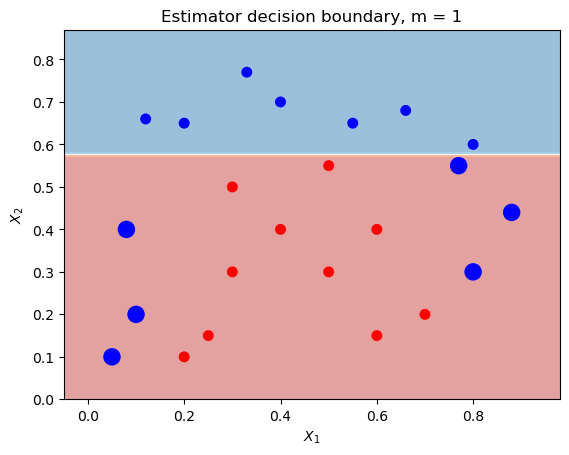

In [3]:
estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2)
estimator.fit(X, y, sample_weight=sample_weight)
r = export_text(estimator)
print(r) # this prints the rules of a decision tree
y_predict = estimator.predict(X)
incorrect = (y_predict != y)
estimator_error = np.mean(np.average(incorrect, weights=sample_weight, axis=0))
estimator_weight =  learning_rate * np.log((1. - estimator_error) / estimator_error)
sample_weight *= np.exp(estimator_weight * incorrect * ((sample_weight > 0) | (estimator_weight < 0)))
print(sample_weight)
s_weights = (sample_weight / sample_weight.sum() ) * 40
plot_decision_boundary(estimator, X,y,N = 50, scatter_weights =s_weights )
plt.title('Estimator decision boundary, m = {}'.format(1))


### After M iterations

In [4]:
def AdaBoost_scratch(X,y, M=15, learning_rate = 1):

    N = len(y)
    estimator_list, y_predict_list, estimator_error_list, estimator_weight_list, sample_weight_list = [], [],[],[],[]

    #Initialize the sample weights
    sample_weight = np.ones(N) / N
    sample_weight_list.append(sample_weight.copy())

    #For m = 1 to M
    for m in range(M):   

        #Fit a classifier
        estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2)
        estimator.fit(X, y, sample_weight=sample_weight)
        print(export_text(estimator))
        y_predict = estimator.predict(X)

        #Misclassifications
        incorrect = (y_predict != y)

        #Estimator error
        estimator_error = np.mean( np.average(incorrect, weights=sample_weight, axis=0))
        
        #Boost estimator weights
        estimator_weight =  learning_rate * np.log((1. - estimator_error) / estimator_error)

        #Boost sample weights
        sample_weight *= np.exp(estimator_weight * incorrect * ((sample_weight > 0) | (estimator_weight < 0)))

        #Save iteration values
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())
        


    #Convert to np array for convenience   
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)

    #Predictions
    preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
    print('Accuracy = ', (preds == y).sum() / N) 
    
    return estimator_list, estimator_weight_list, sample_weight_list

|--- feature_1 <= 0.58
|   |--- class: -1
|--- feature_1 >  0.58
|   |--- class: 1

|--- feature_0 <= 0.16
|   |--- class: 1
|--- feature_0 >  0.16
|   |--- class: 1

|--- feature_0 <= 0.16
|   |--- class: 1
|--- feature_0 >  0.16
|   |--- class: -1

|--- feature_0 <= 0.73
|   |--- class: -1
|--- feature_0 >  0.73
|   |--- class: 1

|--- feature_1 <= 0.58
|   |--- class: 1
|--- feature_1 >  0.58
|   |--- class: 1

|--- feature_1 <= 0.58
|   |--- class: -1
|--- feature_1 >  0.58
|   |--- class: 1

|--- feature_0 <= 0.73
|   |--- class: 1
|--- feature_0 >  0.73
|   |--- class: 1

|--- feature_0 <= 0.73
|   |--- class: -1
|--- feature_0 >  0.73
|   |--- class: 1

|--- feature_0 <= 0.16
|   |--- class: 1
|--- feature_0 >  0.16
|   |--- class: -1

|--- feature_1 <= 0.58
|   |--- class: 1
|--- feature_1 >  0.58
|   |--- class: 1

Accuracy =  1.0
[1.04145387 0.87546874 0.83739679 0.78053386 1.03993142 0.93832294
 0.62863165 0.8769354  0.77916076 1.05526061]


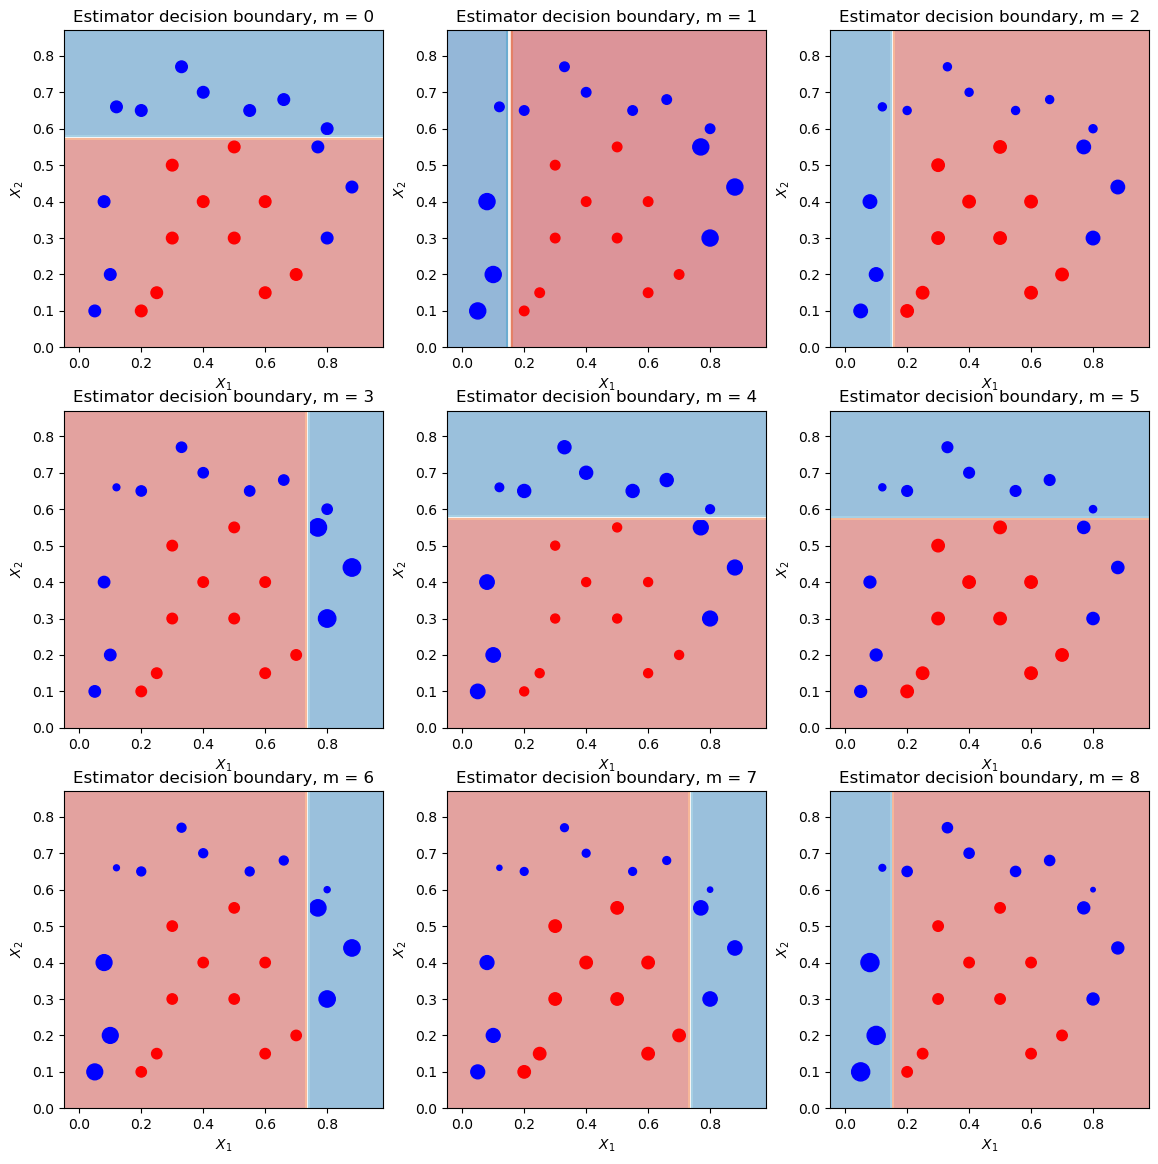

In [5]:
estimator_list, estimator_weight_list, sample_weight_list  = AdaBoost_scratch(X,y, M=10, learning_rate = 1)
print(estimator_weight_list)
fig = plt.figure(figsize = (14,14))
for m in range(0,9):
    fig.add_subplot(3,3,m+1)
    s_weights = (sample_weight_list[m,:] / sample_weight_list[m,:].sum() ) * 40
    plot_decision_boundary(estimator_list[m], X,y,N = 50, scatter_weights =s_weights )
    plt.title('Estimator decision boundary, m = {}'.format(m))
    

In [6]:
def plot_AdaBoost_scratch_boundary(estimators,estimator_weights, X, y, N = 10,ax = None ):
    
    def AdaBoost_scratch_classify(x_temp, est,est_weights ):
        '''Return classification prediction for a given point X '''
        temp_pred = np.asarray( [ (e.predict(x_temp)).T* w for e, w in zip(est,est_weights )]  ) / est_weights.sum()
        return np.sign(temp_pred.sum(axis = 0))
    
    
    '''Utility function to plot decision boundary and scatter plot of data'''
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid( np.linspace(x_min, x_max, N), np.linspace(y_min, y_max, N))


    zz = np.array( [AdaBoost_scratch_classify(np.array([xi,yi]).reshape(1,-1), estimators,estimator_weights ) for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )
            
    # reshape result and plot
    Z = zz.reshape(xx.shape)
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
#     if ax is None:
    ax = plt.gca()
    ax.contourf(xx, yy, Z, 2, cmap='RdBu', alpha=.5)
    ax.contour(xx, yy, Z,  2, cmap='RdBu')
    ax.scatter(X[:,0],X[:,1], c = y, cmap = cm_bright)
    ax.set_xlabel('$X_1$')
    ax.set_ylabel('$X_2$')

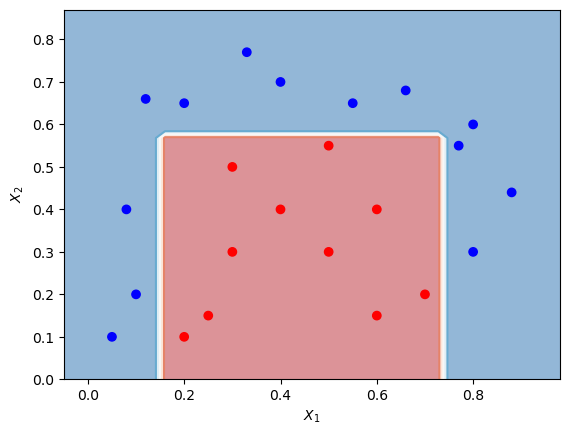

In [7]:
plot_AdaBoost_scratch_boundary(estimator_list,estimator_weight_list, X, y, N = 50,ax = None )

### Running Experiement on learning rate

|--- feature_1 <= 0.58
|   |--- class: -1
|--- feature_1 >  0.58
|   |--- class: 1

|--- feature_1 <= 0.58
|   |--- class: -1
|--- feature_1 >  0.58
|   |--- class: 1

|--- feature_1 <= 0.58
|   |--- class: -1
|--- feature_1 >  0.58
|   |--- class: 1

|--- feature_1 <= 0.58
|   |--- class: -1
|--- feature_1 >  0.58
|   |--- class: 1

|--- feature_1 <= 0.58
|   |--- class: -1
|--- feature_1 >  0.58
|   |--- class: 1

|--- feature_1 <= 0.58
|   |--- class: -1
|--- feature_1 >  0.58
|   |--- class: 1

|--- feature_1 <= 0.58
|   |--- class: -1
|--- feature_1 >  0.58
|   |--- class: 1

|--- feature_1 <= 0.58
|   |--- class: 1
|--- feature_1 >  0.58
|   |--- class: 1

|--- feature_1 <= 0.58
|   |--- class: -1
|--- feature_1 >  0.58
|   |--- class: 1

|--- feature_1 <= 0.58
|   |--- class: 1
|--- feature_1 >  0.58
|   |--- class: 1

Accuracy =  0.7391304347826086
[0.10414539 0.09373085 0.08435776 0.07592199 0.06832979 0.06149681
 0.05534713 0.0549876  0.05308348 0.05268687]
|--- feature_1 <= 

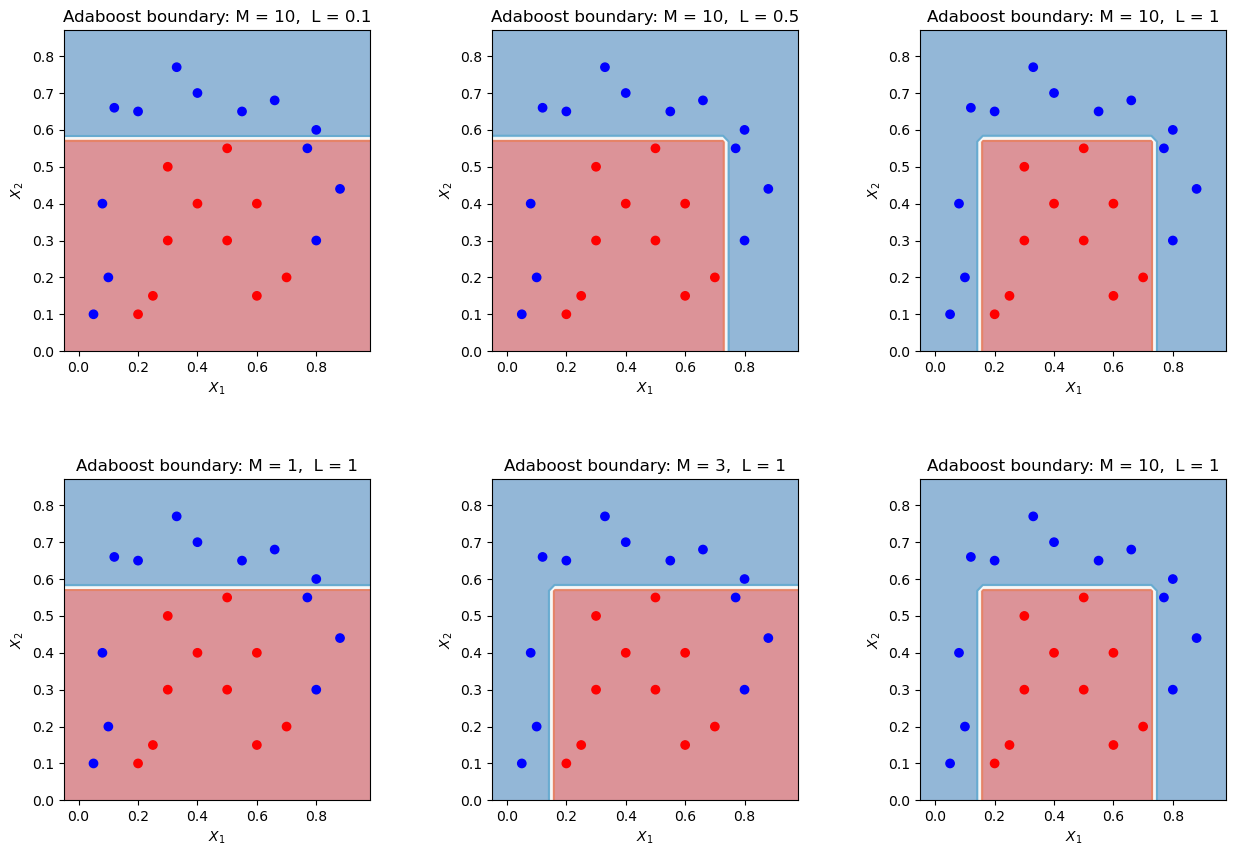

In [8]:
fig = plt.figure(figsize = (15,10))
for k,l in enumerate([0.1,0.5,1]):
    fig.add_subplot(2,3,k+1)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    estimator_list, estimator_weight_list, sample_weight_list = AdaBoost_scratch(X,y, M=10, learning_rate = l)
    plot_AdaBoost_scratch_boundary(estimator_list,estimator_weight_list, X, y, N = 50,ax = None )
    plt.title('Adaboost boundary: M = 10,  L = {}'.format(l))
    print(estimator_weight_list)

for k,m in enumerate([1,3,10]):
    fig.add_subplot(2,3,k+4)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    estimator_list, estimator_weight_list, sample_weight_list = AdaBoost_scratch(X,y, M=m, learning_rate = 1)
    plot_AdaBoost_scratch_boundary(estimator_list,estimator_weight_list, X, y, N = 50,ax = None )
    plt.title('Adaboost boundary: M = {},  L = 1'.format(m))
    print(estimator_weight_list)

## Comparing The performance of AdaBoost with DTree and RFC

In [9]:
from sklearn.datasets import load_wine, load_iris,make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
X_new, y_new = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=0, random_state=0, shuffle=False)
# #print(sum(y==1))
# data = load_wine() # just changed the data and you have new results! iris is another option.
# data = load_iris() # just changed the data and you have new results! iris is another option.
# X_new, y_new = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.33, random_state=42)
scores_ID3 = []
for depth in range(1, X_new.shape[1]):
    decision_tree = DecisionTreeClassifier(random_state=0, max_depth=depth) 
    scores_val = cross_val_score(decision_tree, X_new, y_new, cv=5) # the actual score for the plot
    print(depth,np.average(scores_val))
    scores_ID3 = np.append(scores_ID3, np.average(scores_val))
    clf = decision_tree.fit(X_train, y_train) # for the purpose of plotting. 
#     r = export_text(decision_tree)
# #     r = export_text(decision_tree, feature_names=data['feature_names'])
#     print(r) # this prints the tree

1 0.524
2 0.623
3 0.6679999999999999
4 0.706
5 0.741
6 0.725
7 0.723
8 0.682
9 0.67
10 0.69
11 0.682
12 0.679
13 0.6799999999999999
14 0.677
15 0.6729999999999999
16 0.674
17 0.6719999999999999
18 0.6719999999999999
19 0.6719999999999999


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=0, shuffle=False)
scores_RFC=[]
for depth in range(1, X_new.shape[1]):
    clf= RandomForestClassifier(max_depth=depth, random_state=0, n_estimators=50)
    scores_val = cross_val_score(clf, X_new, y_new, cv=5)
    print(depth, np.average(scores_val))
    scores_RFC = np.append(scores_RFC,np.average(scores_val))
    



1 0.643
2 0.655
3 0.6900000000000001
4 0.717
5 0.7380000000000001
6 0.744
7 0.769
8 0.768
9 0.7659999999999999
10 0.766
11 0.7819999999999999
12 0.788
13 0.7959999999999999
14 0.7849999999999999
15 0.787
16 0.7899999999999999
17 0.7889999999999999
18 0.788
19 0.785


In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import time
start_time = time.time()
base_clf = DecisionTreeClassifier(max_depth=5)
iterations = np.arange(10,200,10)
scores_adaBoost=[]
for i in iterations:
    adaboost = AdaBoostClassifier(base_estimator=base_clf, n_estimators=i)
    scores_val = cross_val_score(adaboost, X_new, y_new, cv=5) # the actual score for the plot
    print("Iteration " , i , "Accuracy is: ",np.average(scores_val))
    scores_adaBoost = np.append(scores_adaBoost,np.average(scores_val))
print("total execution time for ABC is: %s seconds ---" % (time.time() - start_time))

Iteration  10 Accuracy is:  0.697
Iteration  20 Accuracy is:  0.6970000000000001
Iteration  30 Accuracy is:  0.735
Iteration  40 Accuracy is:  0.724
Iteration  50 Accuracy is:  0.7379999999999999
Iteration  60 Accuracy is:  0.76
Iteration  70 Accuracy is:  0.768
Iteration  80 Accuracy is:  0.7700000000000001
Iteration  90 Accuracy is:  0.75
Iteration  100 Accuracy is:  0.7710000000000001
Iteration  110 Accuracy is:  0.768
Iteration  120 Accuracy is:  0.7689999999999999
Iteration  130 Accuracy is:  0.772
Iteration  140 Accuracy is:  0.7630000000000001
Iteration  150 Accuracy is:  0.778
Iteration  160 Accuracy is:  0.767
Iteration  170 Accuracy is:  0.78
Iteration  180 Accuracy is:  0.7809999999999999
Iteration  190 Accuracy is:  0.784
total execution time for ABC is: 120.37244582176208 seconds ---


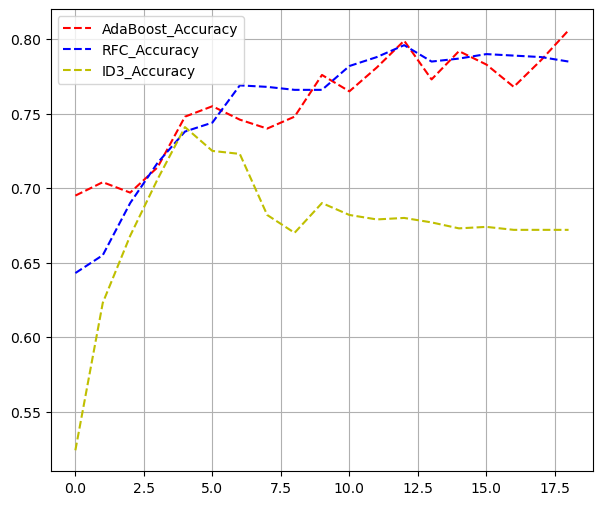

In [12]:
fig, axs = plt.subplots(1,1,figsize=(7,6))
axs.plot(scores_adaBoost,'r--',label='AdaBoost_Accuracy')
axs.plot(scores_RFC,'b--',label='RFC_Accuracy')
axs.plot(scores_ID3,'y--',label='ID3_Accuracy')
axs.grid('True')
axs.legend()

### Experiment on max_depth 

In [13]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import time
start_time = time.time()
base_clf = DecisionTreeClassifier(max_depth=3)
depths = np.arange(1,20,1)
scores_adaBoost=[]
for depth in depths:
    base_clf = DecisionTreeClassifier(max_depth=depth)
    adaboost = AdaBoostClassifier(base_estimator=base_clf, n_estimators=50)
    scores_val = cross_val_score(adaboost, X_new, y_new, cv=5) # the actual score for the plot
    print("Depth " , depth , "Accuracy is: ",np.average(scores_val))
    scores_adaBoost = np.append(scores_adaBoost,np.average(scores_val))
print("total execution time for ABC is: %s seconds ---" % (time.time() - start_time))

Depth  1 Accuracy is:  0.642
Depth  2 Accuracy is:  0.736
Depth  3 Accuracy is:  0.7150000000000001
Depth  4 Accuracy is:  0.728
Depth  5 Accuracy is:  0.7280000000000001
Depth  6 Accuracy is:  0.7769999999999999
Depth  7 Accuracy is:  0.768
Depth  8 Accuracy is:  0.748
Depth  9 Accuracy is:  0.76
Depth  10 Accuracy is:  0.7629999999999999
Depth  11 Accuracy is:  0.766
Depth  12 Accuracy is:  0.7310000000000001
Depth  13 Accuracy is:  0.719
Depth  14 Accuracy is:  0.696
Depth  15 Accuracy is:  0.6900000000000001
Depth  16 Accuracy is:  0.67
Depth  17 Accuracy is:  0.686
Depth  18 Accuracy is:  0.6900000000000001
Depth  19 Accuracy is:  0.683
total execution time for ABC is: 45.773590326309204 seconds ---


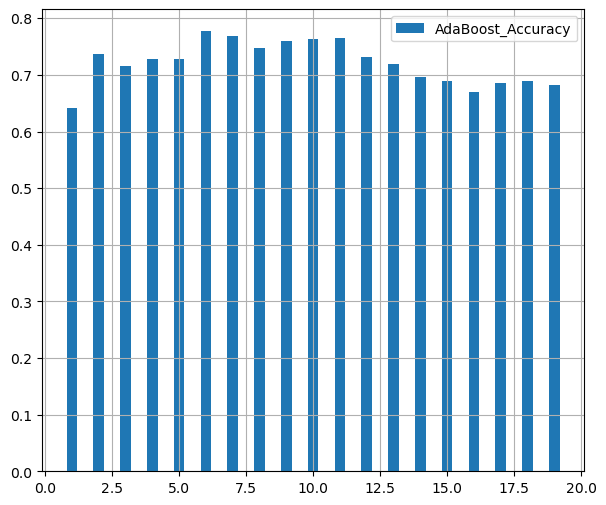

In [14]:
fig, axs = plt.subplots(1,1,figsize=(7,6))
axs.bar(depths,scores_adaBoost,label='AdaBoost_Accuracy',width=0.4)
axs.grid('True')
axs.legend()

### Finally, GridSearch is always helpful

In [39]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import time
start_time = time.time()
grid_params = { 'n_estimators': np.arange(10,350,10)}

base_clf = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=base_clf, learning_rate = 0.1)
grid_object=GridSearchCV(estimator= adaboost,param_grid =grid_params,scoring ='accuracy',cv = 5,n_jobs = -1)
grid_object.fit(X_train, y_train)
print(grid_object.best_params_)
print(grid_object.best_score_)
print("total execution time for ABC is: %s seconds ---" % (time.time() - start_time))

{'n_estimators': 270}
0.8164179104477614
total execution time for ABC is: 184.6560616493225 seconds ---


## Summary
1. Combine weak classifiers to obtain a very strong classifier.
2. It has a nice theoretical proof.
3. Robust against overfitting (please feel free to check the following links if you are interested in details https://jeremykun.com/2015/09/21/the-boosting-margin-or-why-boosting-doesnt-overfit/ 
https://www.youtube.com/watch?v=wPqtzj5VZus)
4. Highly sensitive to the data or outliers.